In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import urllib
from PIL import Image
import matplotlib.pyplot as plt

In [17]:
def load_model (name):
  model = torch.hub.load('pytorch/vision:v0.10.0', name, pretrained=True)
  model.eval()
  return model

In [18]:
def get_example_image():
  url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
  try: urllib.URLopener().retrieve(url, filename)
  except: urllib.request.urlretrieve(url, filename)
  return filename



In [19]:
def openimage_preprocess_output(filename,model):

  input_image = Image.open(filename)
  input_image = input_image.convert("RGB")
  preprocess = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
  with torch.no_grad():
      output = model(input_batch)['out'][0]
  output_predictions = output.argmax(0)
  return output_predictions
 

In [20]:
filename = get_example_image()

In [21]:
#fcn
model = load_model ('fcn_resnet50')
output_predictions_fcn = openimage_preprocess_output(filename,model)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


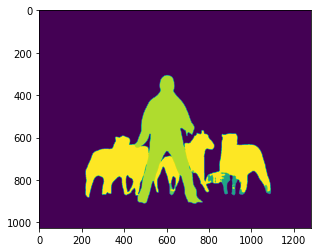

In [23]:
plt.imshow(output_predictions_fcn.cpu())
plt.show()

In [24]:
#deeplab
model = load_model ( 'deeplabv3_resnet50')
output_predictions_deeplab = openimage_preprocess_output(filename,model)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


  0%|          | 0.00/161M [00:00<?, ?B/s]

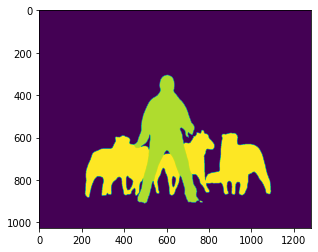

In [25]:
plt.imshow(output_predictions_deeplab.cpu())
plt.show()